<a href="https://colab.research.google.com/github/skj092/DLCVNLP/blob/main/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objective: - Image Classification with CIFAR 100

`This dataset is just like the CIFAR-10, except it has 100 classes containing 600
images each. There are 500 training images and 100 testing images per class.
The 100 classes in the CIFAR-100 are grouped into 20 superclasses. Each image
comes with a &quot;fine&quot; label (the class to which it belongs) and a &quot;coarse&quot; label
(the superclass to which it belongs).`

**Dataset Link: -** https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [11]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar100.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

169009152/169001437 [==============================] - 2s 0us/step


In [12]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
Total params: 56,320
Trainable params: 56,320
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(100))

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 4.0958 - accuracy: 0.0707 - val_loss: 3.6864 - val_accuracy: 0.1352
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 3.4007 - accuracy: 0.1839 - val_loss: 3.2271 - val_accuracy: 0.2134
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 3.0839 - accuracy: 0.2415 - val_loss: 3.0241 - val_accuracy: 0.2561
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.8926 - accuracy: 0.2797 - val_loss: 2.8873 - val_accuracy: 0.2872
Epoch 5/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.7595 - accuracy: 0.3053 - val_loss: 2.8080 - val_accuracy: 0.2986
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.6571 - accuracy: 0.3283 - val_loss: 2.7173 - val_accuracy: 0.3182
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 2.5623 - accuracy: 0.3447 - val_loss: 2.7361 - val_accuracy:

313/313 - 1s - loss: 2.7177 - accuracy: 0.3273


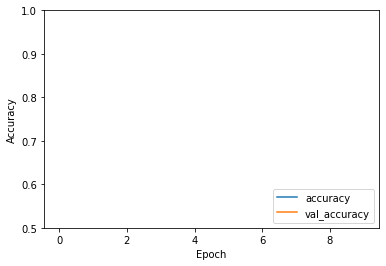

In [17]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)